In [1]:
import pandas as pd

In [2]:
messages= pd.read_csv(r"D:\Data Science\python\spam1.csv", encoding='cp1252')

In [3]:
messages.shape

(6776, 5)

In [4]:
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
messages.isnull().sum()

v1               0
v2               0
Unnamed: 2    6720
Unnamed: 3    6760
Unnamed: 4    6768
dtype: int64

In [6]:
messages= messages.loc[:,['v1','v2']]
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
messages.rename(columns={'v1':'label','v2':"X"}, inplace=True)

In [8]:
messages.head()

,label,X
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages.label.value_counts()

ham     5854
spam     922
Name: label, dtype: int64

In [10]:
messages.label.replace({'ham':0,"spam":1}, inplace= True) # label is our y variable

In [11]:
#aim (requiment is to build nlp model which can predict if email is spam or ham)

In [12]:
messages.X= messages.X.str.lower()

In [13]:
# nlp library --> NLTK

In [47]:
from nltk.corpus import stopwords

In [48]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
#import nltk

In [17]:
#nltk.download('stopwords')

In [49]:
import string

In [19]:
string.punctuation # this shows us the special characters

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def text_process(mess):            ### creating a function
    """                                                        ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not  in stopwords.words("english")]

In [21]:
messages['X'].apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
6771    [2nd, time, tried, 2, contact, u, u, å£750, po...
6772                   [ì, b, going, esplanade, fr, home]
6773                     [pity, mood, soany, suggestions]
6774    [guy, bitching, acted, like, id, interested, b...
6775                                   [rofl, true, name]
Name: X, Length: 6776, dtype: object

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
bow_transformer = CountVectorizer(analyzer= text_process). fit(messages['X'])

In [24]:
len(bow_transformer.vocabulary_)

9422

In [25]:
tdm= bow_transformer.transform(messages.X)

In [26]:
tdm.shape # 6776 row/documents and 9422 columns/feature
# this tdm acts as x variable 

(6776, 9422)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train_x,test_x,train_y,test_y=train_test_split(tdm,messages.label, test_size=.2, random_state=11)

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()

In [30]:
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [31]:
pred= dt.predict(test_x)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
tab= confusion_matrix(test_y,pred)
tab

array([[1159,    9],
       [  24,  164]], dtype=int64)

In [34]:
tab.diagonal().sum()*100/tab.sum()

97.56637168141593

In [36]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()

In [37]:

nb.fit(train_x,train_y)
pred_nb= nb.predict(test_x)
tab_nb=confusion_matrix(test_y, pred_nb)

In [38]:
tab_nb.diagonal().sum()*100/tab_nb.sum()

98.08259587020649

In [52]:
import matplotlib.pyplot as plt

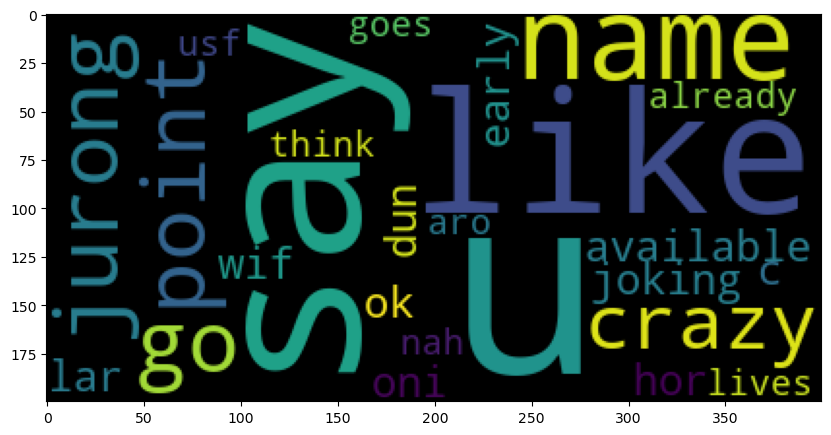

In [57]:
from wordcloud import WordCloud
cloud= WordCloud(stopwords = stopwords.words("english"),max_words=25).generate(str(messages.X[messages.label==0]))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

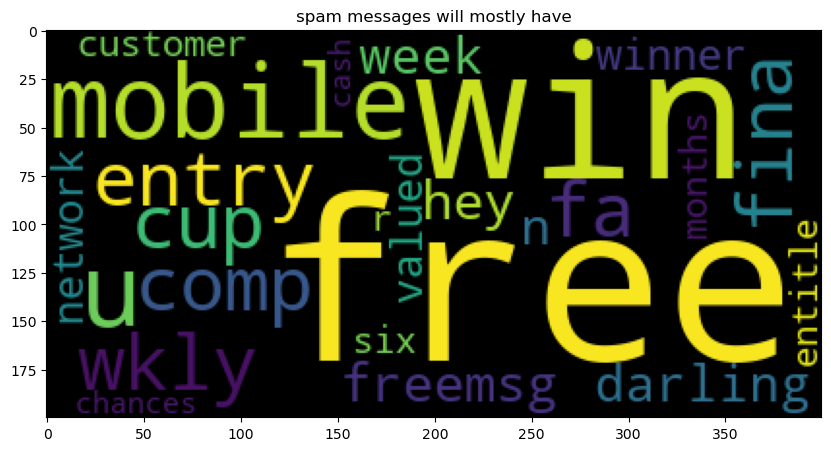

In [60]:
cloud= WordCloud(stopwords = stopwords.words("english"),max_words=25).generate(str(messages.X[messages.label==1]))
plt.figure(figsize=(10,10))
plt.title("spam messages will mostly have")
plt.imshow(cloud)